# PISTE 10 | 2019
> We used the IBM Watson Studio to benefit from it's performance and for the simple use of Jupyter notebook for AI tasks
![title](piste_notebook/fl1.png)

# Part4:
it consists of :
> exploitation of the measures collected by the different sensors (Temperature, Humidity, Luminosity)
> establishing analyzes and statistics by applying the approaches of fuzzy logic

# Fuzzy Logic : What is it ?

![title](piste_notebook/fl2.png)

> Fuzzy logic is a branch of machine intelligence that helps computers understand the variations that occur in the uncertain and vague world in which we exist. Fuzzy logic "manipulates" vague concepts such as "hot" or "fast", so as to facilitate the design of machines such as air conditioners and speed control systems to pass or pass a set of criteria. control to another. Even if the reason is that "it is too hot or not enough to go faster or slower": all these "instructions" are far from the digital world of simple 1 and 0 binaries. Neural networks, which are collections of "neurons" and "synapses," change in response to inputs from surrounding neurons and synapses. The neural network acts like a computer because it maps the inputs to the outputs. Neurons and synapses can be silicon components or software equations that simulate their behavior. A neuron adds all incoming signals from other neurons and then emits its own response as a numbe

> Fuzzification is the process of converting a clear entry into a fuzzy value. It converts a value in clear points of the process state variable to be compatible with the representation of the fuzzy set of the system state variable in the previous rule.

![title](piste_notebook/fl3.png)

> Defuzzification is the inverse process of conversion

> Fuzzification is defined as a mapping from a real value point X∈ U ⊂ Rn to a fuzzy set A ∈ U. If the form of uncertainty occurs because of inaccuracy, ambiguity or the blur, then the variable is probably fuzzy and can be represented by a membership function.
In fuzzy control, the inputs usually come from a piece of material, or a sensor.

![title](piste_notebook/fl4.png)

> Examples of Fuzifier functions :

![title](piste_notebook/fl5.png)

> Defuzzification:
This is a mapping from a set blur B0 ∈ V ⊂ R (the output of the inference engine fuzzy) at point y ∈ V

## Now we understand how fuzzy logic is structured, Let's start with building our prediction model based on it :

In [2]:
#installing libraries to use 
install.packages("sets")

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message in unlink(tmpf):
"cannot get info on 'C:\Users\Dell\AppData\Local\Temp\RtmpqoI1Sc\file3294353c7bf0', reason 'Accès refusé'"Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  impossible d'ouvrir l'URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'sets' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dell\AppData\Local\Temp\RtmpqoI1Sc\downloaded_packages


In [5]:
install.packages('RMySQL',type='source')

Installing package into 'C:/Users/Dell/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message in install.packages("RMySQL", type = "source"):
"installation of package 'RMySQL' had non-zero exit status"

In [6]:
#----Loading libraries-------#
library(sets)
library(RMySQL)
library(DBI)

ERROR: Error in library(RMySQL): there is no package called 'RMySQL'


> Fuzzy system rules :
> The fuzzy rules are IF-THEN- linguistic constructs that have the general form "IF A THEN B" where A and B are (collections of) propositions containing linguistic variables. A is called the premise and B is the consequence of the rule. Indeed, the use of linguistic variables and fuzzy IF-THEN rules exploits the tolerance of imprecision and uncertainty. In this respect, fuzzy logic mimics the critical ability of the human mind to summarize data and focus on information useful to decision making.

![title](piste_notebook/fl6.png)

A fuzzy system consisting of 4 variables and 13 rules.

Variables:

Temperature(Cold, Medium, Hot)
Humidity(Dry, Medium, Wet)
Luminosity(Dark, Medium, Light)
Duration(Zero, VShort, Short, Long, VLong)

Rules:

Humidity %is% Dry && Temperature %is% Cold => Duration %is% VLong
Humidity %is% Medium && Temperature %is% Cold => Duration %is% Short
Humidity %is% Dry && Temperature %is% Hot && Luminosity %is%  => Duration %is% VLong
    Dark => Duration %is% VLong
Humidity %is% Dry && Temperature %is% Hot && Luminosity %is%  => Duration %is% Zero
    Light => Duration %is% Zero
Humidity %is% Dry && Temperature %is% Hot && Luminosity %is%  => Duration %is% VShort
    Medium => Duration %is% VShort
Humidity %is% Dry && Temperature %is% Medium && Luminosity %is%  => Duration %is% Short
    Light => Duration %is% Short
Humidity %is% Medium && Temperature %is% Hot && Luminosity %is%  => Duration %is% Long
    Dark => Duration %is% Long
Humidity %is% Medium && Temperature %is% Hot && Luminosity %is

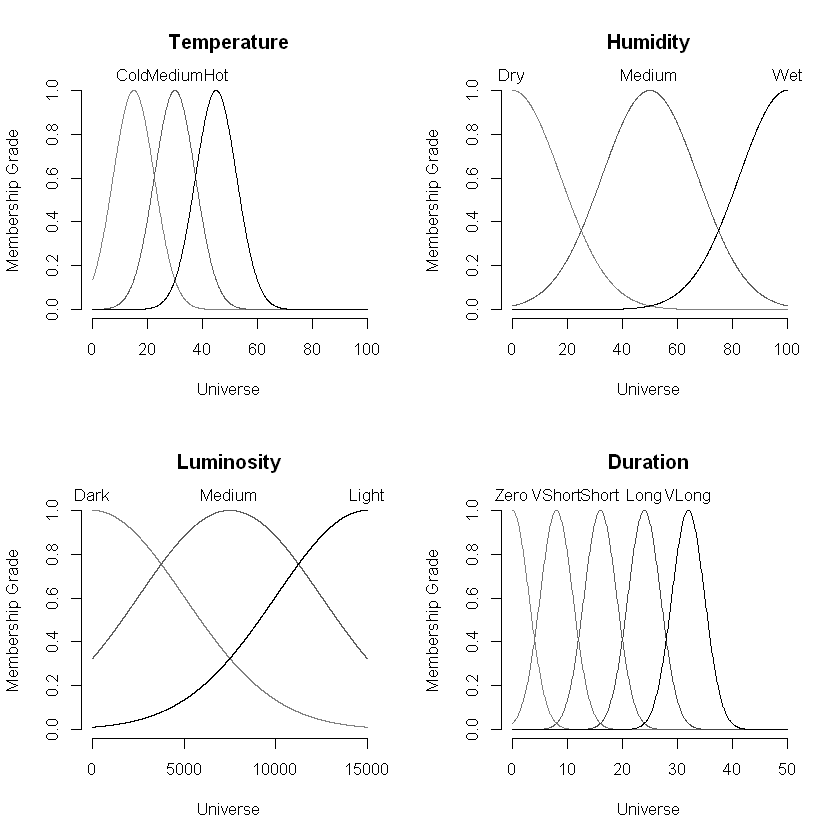

In [7]:
#------------Building our water prediction system based on fuzzy system-----------#
variables <- set(
  Temperature = fuzzy_partition(varnames = c(Cold = 15, Medium = 30, Hot = 45), sd = 7.5,
                                universe = seq( from = 0, to= 100, by = 0.1 )),
  Humidity = fuzzy_partition(varnames = c(Dry = 0, Medium = 50, Wet = 100), sd = 17.5,
                             universe = seq( from = 0, to= 100, by = 0.1 )),
  Luminosity = fuzzy_partition(varnames = c(Dark = 0, Medium = 7500, Light = 15000), sd = 5000,
                               universe = seq( from = 0, to= 15000, by = 1 )),
  Duration = fuzzy_partition(varnames =c(Zero = 0, VShort= 8, Short = 16, Long = 24, VLong = 32), sd = 3,
                          universe = seq( from = 0, to= 50, by = 0.1 ))
)

rules <-set(
  #-------------------------------------------------------------------------------------------------------------#
  fuzzy_rule(Humidity %is% Wet ,Duration %is% Zero),
  #-------------------------------------------------------------------------------------------------------------#
  fuzzy_rule(Humidity %is% Medium && Temperature %is% Cold, Duration %is% Short),
  fuzzy_rule(Humidity %is% Medium && Temperature %is% Medium && Luminosity %is% Light || Luminosity %is% Medium, Duration %is% VShort),
  fuzzy_rule(Humidity %is% Medium && Temperature %is% Medium && Luminosity %is% Dark, Duration %is% Short),
  fuzzy_rule(Humidity %is% Medium && Temperature %is% Hot && Luminosity %is% Light, Duration %is% Zero),
  fuzzy_rule(Humidity %is% Medium && Temperature %is% Hot && Luminosity %is% Medium, Duration %is% VShort),
  fuzzy_rule(Humidity %is% Medium && Temperature %is% Hot && Luminosity %is% Dark, Duration %is% Long),
  #-------------------------------------------------------------------------------------------------------------#
    fuzzy_rule(Humidity %is% Dry && Temperature %is% Cold, Duration %is% VLong),
  fuzzy_rule(Humidity %is% Dry && Temperature %is% Medium && Luminosity %is% Light, Duration %is% Short),
  fuzzy_rule(Humidity %is% Dry && Temperature %is% Medium && Luminosity %is% Medium || Luminosity %is% Dark, Duration %is% Long),
  fuzzy_rule(Humidity %is% Dry && Temperature %is% Hot && Luminosity %is% Light, Duration %is% Zero),
  fuzzy_rule(Humidity %is% Dry && Temperature %is% Hot && Luminosity %is% Medium, Duration %is% VShort),
  fuzzy_rule(Humidity %is% Dry && Temperature %is% Hot && Luminosity %is% Dark, Duration %is% VLong)
)

Water_System <- fuzzy_system(variables, rules)
print(Water_System)
plot(Water_System)

In [8]:
#------------------Simple test---------------#
debit = 0.67
f1 <- fuzzy_inference(Water_System, list( Temperature= 30, Humidity= 65 , Luminosity= 6200))
duration1 <- gset_defuzzify(f1, "centroid")
print(duration1)
volume1 = duration1 * debit
print(volume1)

[1] 14.61566
[1] 9.792491


# Remote Access to Database located in a AWS instance

![title](piste_notebook/fl7.png)

In [11]:
#----DataBase (Sensor_Data) variables retrieve -------#
mySqlCreds <- list(dbhostname ="ec2-108-128-15-84.eu-west-1.compute.amazonaws.com",
                   dbname ='PISTE10',
                   username='piste10',
                   pass = 'piste10',
                   port = 3306
)

# Exploiting mesures stored in a table in our database, making decisions and storing them in another table for the results

![title](piste_notebook/fl8.png)

In [12]:
count <- 1
while (TRUE) {
  con<- dbConnect(
    dbDriver("MySQL"),
    host = mySqlCreds$dbhostname,
    dbname = mySqlCreds$dbname,
    user =mySqlCreds$username,
    password = mySqlCreds$pass,
    port=mySqlCreds$port
  )
  RowQuery <- "SELECT COUNT(*) FROM Agro_Environmental_Parameters "
  rowscount <- dbGetQuery(con, RowQuery)
  
  while (count <= rowscount) {
    myQuery <- paste("SELECT * from Agro_Environmental_Parameters where Row_ID = '",count,"';",sep="")
    data.frame <- dbGetQuery(con, myQuery)
    
    #----Fuzzy Logic : Duration prediction-------#
    options(digits=3)
    v1 <-  as.double(data.frame$Temperature)
    v2 <- as.double(data.frame$Humidity)
    v3 <- as.double(data.frame$Luminosity)
    f1 <- fuzzy_inference(Water_System, list( Temperature= v1, Humidity= v2 , Luminosity=  v3  ))
    duration <- gset_defuzzify(f1, "centroid")
    if (duration < 12.5) 
      decision <- 0
    else
      decision <- 1
    #-----Seeing results---#
    print(duration)
    print(decision)
    
    
    #----DataBase (resultat) Writing -------#
    values <- data.frame(
      Row_ID= data.frame$Row_ID ,
      Node_ID= data.frame$Node_ID ,
      Luminosity = data.frame$Luminosity ,
      Humidity = data.frame$Humidity , 
      Temperature = data.frame$Temperature  , 
      Time = data.frame$Time , 
      Date =  data.frame$Date , 
      Duration = duration ,
      Decision = decision 
    )
    
    dbWriteTable(con,"resultats",values, overwrite=FALSE,append=TRUE, row.names = FALSE)
    count <- count +1
  }
  #----Disconnect -------#
  dbDisconnect(con)
  Sys.sleep(20)
  print('Data stored successfully : Sleep Time before Relaunch!')
}

#lapply(dbListConnections(MySQL()), dbDisconnect)

ERROR: Error in dbConnect(dbDriver("MySQL"), host = mySqlCreds$dbhostname, dbname = mySqlCreds$dbname, : impossible de trouver la fonction "dbConnect"


# Sensor's measurments :

![title](piste_notebook/fl10.png)

# Results using Fuzzy logic aproach :

![title](piste_notebook/fl9.png)

In [13]:
#______________________________________Fin_______________________________________________